##Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing packages for the further analysis
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading the Breast Cancder Dataset

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/random_survival_forest/data/raw/wpbc.data", header=None)

In [ ]:
# Displaying the contents of the dataframe
print(df)

         0  1    2      3      4   ...       30      31       32   33  34
0    119513  N   31  18.02  27.60  ...  0.11700  0.2677  0.08113  5.0   5
1      8423  N   61  17.99  10.38  ...  0.26540  0.4601  0.11890  3.0   2
2    842517  N  116  21.37  17.44  ...  0.20320  0.4334  0.09067  2.5   0
3    843483  N  123  11.42  20.38  ...  0.25750  0.6638  0.17300  2.0   0
4    843584  R   27  20.29  14.34  ...  0.16250  0.2364  0.07678  3.5   0
..      ... ..  ...    ...    ...  ...      ...     ...      ...  ...  ..
193  942640  N   10  22.52  21.92  ...  0.09378  0.2061  0.05788  6.0   2
194  943471  N    8  15.44  31.18  ...  0.12860  0.2914  0.08024  1.5   0
195   94547  N   12  17.17  29.19  ...  0.09520  0.3362  0.06033  3.7   0
196  947204  R    3  21.42  22.84  ...  0.22150  0.2832  0.08981  3.0   ?
197  947489  N    6  16.70  28.13  ...  0.13170  0.3035  0.08036  3.5   0

[198 rows x 35 columns]


In [ ]:
# Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       198 non-null    int64  
 1   1       198 non-null    object 
 2   2       198 non-null    int64  
 3   3       198 non-null    float64
 4   4       198 non-null    float64
 5   5       198 non-null    float64
 6   6       198 non-null    float64
 7   7       198 non-null    float64
 8   8       198 non-null    float64
 9   9       198 non-null    float64
 10  10      198 non-null    float64
 11  11      198 non-null    float64
 12  12      198 non-null    float64
 13  13      198 non-null    float64
 14  14      198 non-null    float64
 15  15      198 non-null    float64
 16  16      198 non-null    float64
 17  17      198 non-null    float64
 18  18      198 non-null    float64
 19  19      198 non-null    float64
 20  20      198 non-null    float64
 21  21      198 non-null    float64
 22  22

# Data Preprocessing

In [ ]:
# Making the X Dataframe
id = df.iloc[:,0]
status = df.iloc[:,1]
time = df.iloc[:,2]
X = df.drop(df.columns[[0,1,2]], axis = 1)
X = X.drop(X.columns[-1], axis = 1)

# Making the Y Dataframe
Y = pd.DataFrame({"status": status, "time" : time})
Y["status"] = Y["status"].replace(["N"],0).replace(["R"],1)

In [ ]:
# Printing the information of the X Dataframe
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3       198 non-null    float64
 1   4       198 non-null    float64
 2   5       198 non-null    float64
 3   6       198 non-null    float64
 4   7       198 non-null    float64
 5   8       198 non-null    float64
 6   9       198 non-null    float64
 7   10      198 non-null    float64
 8   11      198 non-null    float64
 9   12      198 non-null    float64
 10  13      198 non-null    float64
 11  14      198 non-null    float64
 12  15      198 non-null    float64
 13  16      198 non-null    float64
 14  17      198 non-null    float64
 15  18      198 non-null    float64
 16  19      198 non-null    float64
 17  20      198 non-null    float64
 18  21      198 non-null    float64
 19  22      198 non-null    float64
 20  23      198 non-null    float64
 21  24      198 non-null    float64
 22  25

In [ ]:
# Printing the information of the Y Dataframe
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  198 non-null    int64
 1   time    198 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB
None


In [ ]:
# Adding column names to the X dataset
X.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
              

In [ ]:
# Dividing the dataset into training, validation and testing sets
from sklearn.model_selection import train_test_split

# Randomly splitting the data into training and testing in a ratio of 4:1
X_train_whole, X_test, Y_train_whole, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 20)

In [ ]:
# Performing normalization and scaling on the training dataframe

# Importing necessary packages
import numpy as np
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing import StandardScaler

# Initializing the object for MinMaxScaler
scaling = MinMaxScaler()

# Fitting the data and performing the normalization
scaled = scaling.fit_transform(X_train_whole)

# Converting the normalized array to dataframe
X_train_scaled = pd.DataFrame(scaled)

# Initializing the object for StandardScaler
scaling = StandardScaler()

# Fitting the data and performing the scaling
scaled = scaling.fit_transform(X_train_scaled)

# Converting the scaled array to dataframe
X_train_scaled = pd.DataFrame(scaled)

# Setting the row and the column indices for the X_train_scaled dataframes
X_train_scaled.index = X_train_whole.index
X_train_scaled.columns = X_train_whole.columns

# Converting Y_train to dataframe
Y_train_whole = pd.DataFrame(Y_train_whole)

# Concatenating the X_train_scaled and Y_train dataframes
train_scaled = pd.concat([X_train_scaled, Y_train_whole], axis=1)

# Displaying the normalized and scaled dataframe
print(train_scaled)

            1         2         3         4  ...        30        31  status  time
150  0.124505  1.268599  0.132562  0.046072  ...  0.013718 -0.730130       1    16
122  0.272888 -0.808204  0.197804  0.174344  ... -0.386641 -0.464934       0    70
44  -0.813150  0.341293 -0.794799 -0.839123  ... -0.061149 -0.889248       0   106
133  0.973762 -0.148433  0.901480  0.925898  ... -1.054516 -0.995327       0    61
197 -0.206989  1.291272 -0.193645 -0.225731  ... -0.460596  0.330657       0     6
..        ...       ...       ...       ...  ...       ...       ...     ...   ...
148 -0.027035  0.676847 -0.095783 -0.103109  ... -0.502595  3.247821       0    13
137 -1.981272 -0.817273 -1.917885 -1.705669  ...  2.275729 -0.464934       0     7
156 -0.210146 -0.506659 -0.342769 -0.304276  ... -0.649135 -0.199737       0    36
15  -0.386943 -0.397831 -0.296168 -0.470409  ...  1.084236  0.065460       1    10
99   1.848275  1.028271  1.819522  1.991069  ... -0.167973 -0.730130       0    83

[15

In [ ]:
# Randomly splitting the training set into training and validation set in a ratio of 4:1
X_train, X_val, Y_train, Y_val = train_test_split(X_train_whole, Y_train_whole, test_size=0.25, random_state=1)

In [ ]:
# Converting the status field of the response variable to boolean for the train dataset
Y_train_whole['status'] = Y_train_whole['status'].astype('bool')

# Converting the status field of the response variable to boolean for the train dataset
Y_train['status'] = Y_train['status'].astype('bool')

# Converting the status field of the response variable to boolean for the validation dataset
Y_val['status'] = Y_val['status'].astype('bool')

# Converting the status field of the response variable to boolean for the test dataset
Y_test['status'] = Y_test['status'].astype('bool')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
# Converting the response variable of the training dataframe to structured array
arr_train_whole = Y_train_whole.to_records(index=False)

# Converting the response variable of the training dataframe to structured array
arr_train = Y_train.to_records(index=False)

# Converting the response variable of the validation dataframe to structured array
arr_val = Y_val.to_records(index=False)

# Converting the response variable of the test dataframe to structured array
arr_test = Y_test.to_records(index=False)

#Model Building - coxph

In [ ]:
!pip install -U scikit-survival

Requirement already up-to-date: scikit-survival in /usr/local/lib/python3.6/dist-packages (0.13.1)


In [ ]:
# Importing necessary package for Cox
from sksurv.linear_model import CoxnetSurvivalAnalysis

In [ ]:
# Hyperparameter optimization
# Considering two hyperparameters namely, l1_ratio and n_alphas
cindex_cox=[]
param1_cox = []
param2_cox = []
for i in 0.001, 0.025, 0.01, 0.1, 0.25,0.5, 0.75, 0.99:
  for j in range(1,501):
    estimator = CoxnetSurvivalAnalysis(l1_ratio=i, n_alphas=j,fit_baseline_model=True)
    estimator.fit(X_train, arr_train)
    k = estimator.score(X_val, arr_val)
    cindex_cox.append(k)
    param1_cox.append(i)
    param2_cox.append(j)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: all coefficients are zero, consider decreasing alpha.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: all coefficients are zero, consider decreasing alpha.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: all coefficients are zero, consider decreasing alpha.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: all coefficients are zero, consider decreasing alpha.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: all coefficients are zero, consider decreasing alpha.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: all coefficients are zero, consider decreasing alpha.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/i

In [ ]:
# Printing the highest cindex
print("Highest c-index value is "+ str(max(cindex_cox)))

# Printing the hyperparameters having highest cindex
print("Optimum l1_ratio is "+ str(param1_cox[cindex_cox.index(max(cindex_cox))]))
print("Optimum n_alphas is "+ str(param2_cox[cindex_cox.index(max(cindex_cox))]))


Highest c-index value is 0.8252148997134671
Optimum l1_ratio is 0.001
Optimum n_alphas is 3


**Observation:**

Hyperparameter chosen is l1_score = 0.001 and n_alphas = 3



In [ ]:
fmt = '{:<8}{:<20}{}'

print(fmt.format('l1_ratio', 'n_alphas','c-index'))
for i,(ele1, ele2, ele3) in enumerate(zip(param1_cox, param2_cox, cindex_cox)):
    print(fmt.format(ele1, ele2, ele3))

l1_ration_alphas            c-index
0.001   1                   0.5
0.001   2                   0.8223495702005731
0.001   3                   0.8252148997134671
0.001   4                   0.8223495702005731
0.001   5                   0.8252148997134671
0.001   6                   0.8252148997134671
0.001   7                   0.8252148997134671
0.001   8                   0.8252148997134671
0.001   9                   0.8252148997134671
0.001   10                  0.8252148997134671
0.001   11                  0.8252148997134671
0.001   12                  0.8252148997134671
0.001   13                  0.8252148997134671
0.001   14                  0.8252148997134671
0.001   15                  0.8252148997134671
0.001   16                  0.8252148997134671
0.001   17                  0.8252148997134671
0.001   18                  0.8252148997134671
0.001   19                  0.8252148997134671
0.001   20                  0.8252148997134671
0.001   21                  0.822349570

In [ ]:
# Building the model with the chosen hyperparameters
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.001, n_alphas=3,fit_baseline_model=True)
estimator.fit(X_train, arr_train)
k = estimator.score(X_val, arr_val)

In [ ]:
# Printing the cindex for the best chosen model
print(k)

0.8252148997134671


# Saving Model

In [ ]:
# Saving the model with the best chosen hyperparameters
import _pickle as cPickle

with open('/content/drive/My Drive/Colab Notebooks/random_survival_forest/models/coxph'.format(1), 'wb') as f:
  cPickle.dump(estimator, f)

# Testing

In [ ]:
# Testing it on the test data using the chosen hyperparameters
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.001, n_alphas=3, fit_baseline_model=True)
estimator.fit(X_train_whole, arr_train_whole)
estimator.score(X_test, arr_test)

0.6223021582733813

In [ ]:
# Printing the predicted risk scores for the test dataset
estimator.predict(X_test)

array([1.11612227, 1.45233374, 1.07632895, 0.98830684, 1.91854552,
       2.05202381, 1.28923792, 0.99575011, 1.0864683 , 2.45219471,
       2.53715418, 1.34266271, 0.82449198, 1.90423276, 0.69036121,
       2.14219299, 1.4685178 , 1.05146284, 1.44251918, 1.37393329,
       1.02817523, 1.24926641, 1.00419841, 3.06120248, 2.32270398,
       2.8000266 , 2.10352074, 1.73442874, 0.93138852, 1.56014291,
       1.81740135, 2.37359866, 2.19496246, 1.05063443, 1.30187827,
       1.523683  , 2.27944988, 1.55279084, 0.97609791, 2.17761504])

# Prediction and Visualization

In [ ]:
# Computing the survival function for the test dataset and the five highest alphas.
surv_funcs = {}
for alpha in estimator.alphas_[:5]:
  surv_funcs[alpha] = estimator.predict_survival_function(X_test, alpha=alpha)

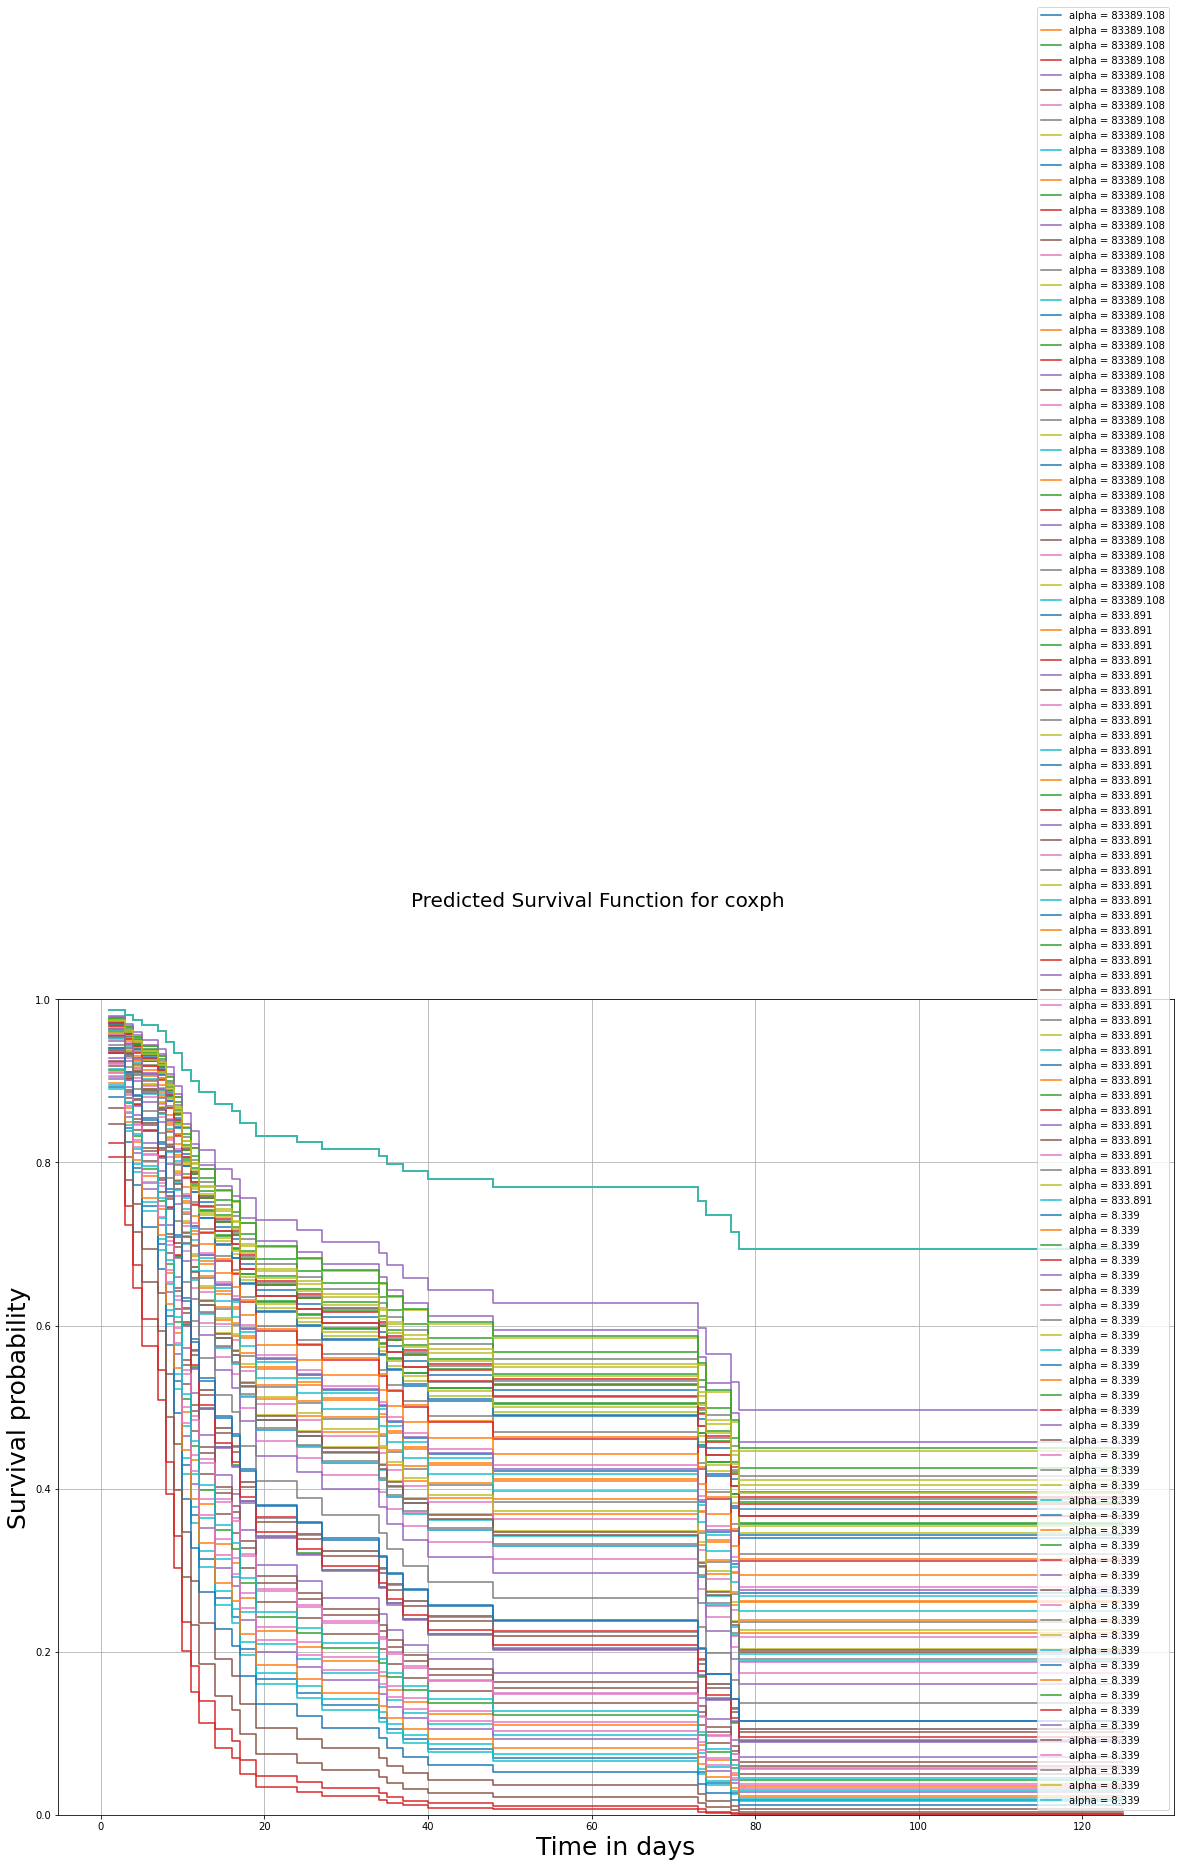

In [ ]:
# Plotting the predicted survival function
fig= plt.figure(figsize=(20,15))
for alpha, surv_alpha in surv_funcs.items():
  for fn in surv_alpha:
    plt.step(fn.x, fn(fn.x), where="post", label="alpha = {:.3f}".format(alpha))
fig.suptitle('Predicted Survival Function for coxph', fontsize=20)
plt.ylim(0, 1)
plt.ylabel("Survival probability", fontsize=25)
plt.xlabel("Time in days",  fontsize=25)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Computing the cumulative hazard function for the test dataset and the five highest alphas.
chf_funcs = {}
for alpha in estimator.alphas_[:5]:
  chf_funcs[alpha] = estimator.predict_cumulative_hazard_function(X_test, alpha=alpha)

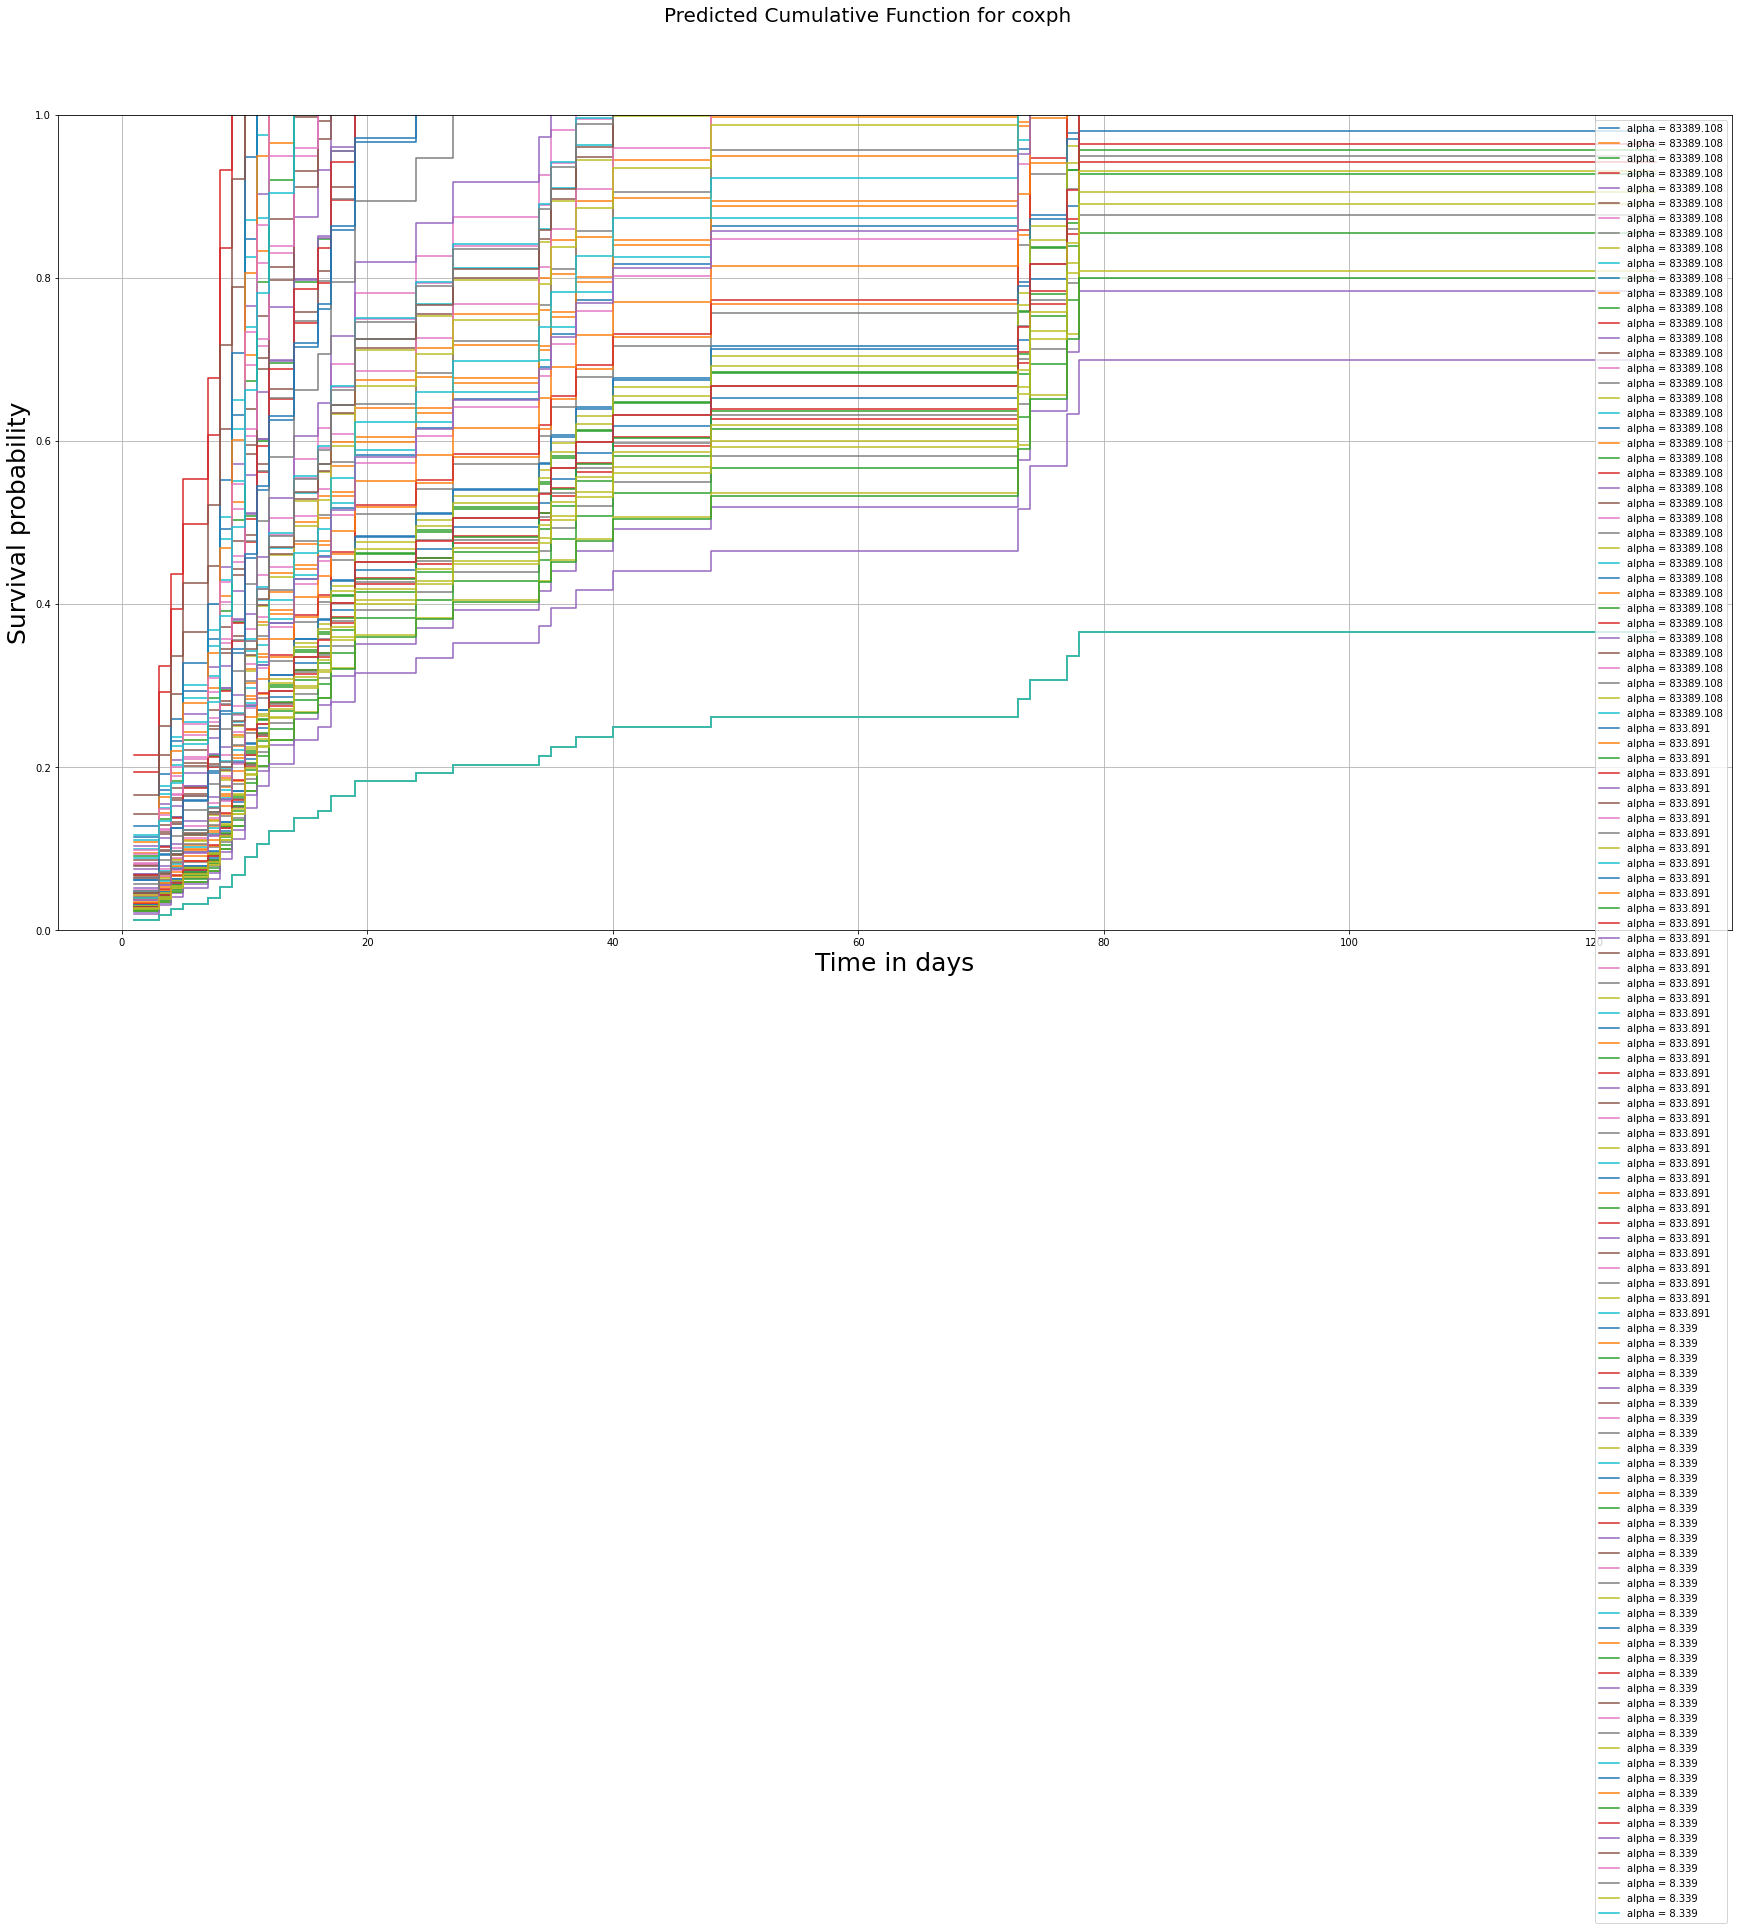

In [ ]:
# Plotting the predicted cumulative hazard function
fig= plt.figure(figsize=(30,15))
for alpha, chf_alpha in chf_funcs.items():
  for fn in chf_alpha:
    plt.step(fn.x, fn(fn.x), where="post", label="alpha = {:.3f}".format(alpha))
fig.suptitle('Predicted Cumulative Function for coxph', fontsize=20)
plt.ylim(0, 1)
plt.ylabel("Survival probability", fontsize=25)
plt.xlabel("Time in days",  fontsize=25)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Selecting feature importance using coefficients
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.001, n_alphas=3, fit_baseline_model=True)
estimator.fit(X_train_whole, arr_train_whole)
estimator.score(X_val, arr_val)

# Storing the coefficients of the features
coeff =[]
estimator.coef_
for i in estimator.coef_:
  coeff.append(max(i.tolist()))

# Sorting the coefficients and returning the indices
s = np.array(coeff) 
sort_index = np.argsort(s) 
print(sort_index)

[ 0 28 27 26 25 24 21 19 18 17 16 29 14 15 11 10  9  8  7  6 13  5  4  2
  1 20 23  3 12 22 30]


# Model Building - RSF

In [ ]:
# Importing necessary package for RSF
from sksurv.ensemble import RandomSurvivalForest

In [ ]:
# Hyperparameter optimization
# Considering two hyperparameters namely, n_estimators and max_features
cindex_rsf=[]
param1_rsf=[]
param2_rsf=[]
for i in range(1,101):
  for j in "auto", "sqrt", "log2":
    rsf = RandomSurvivalForest(n_estimators=i,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features=j,
                           n_jobs=-1,
                           random_state=20)
    rsf.fit(X_train, arr_train)
    k = rsf.score(X_val, arr_val)
    cindex_rsf.append(k)
    param1_rsf.append(i)
    param2_rsf.append(j)

In [ ]:
# Printing the highest cindex
print("Highest c-index value is "+ str(max(cindex_rsf)))

# Printing the hyperparameters having highet cindex
print("Optimum n_estimators is "+ str(param1_rsf[cindex_rsf.index(max(cindex_rsf))]))
print("Optimum max_features is "+ str(param2_rsf[cindex_rsf.index(max(cindex_rsf))]))

Highest c-index value is 0.7979942693409742
Optimum n_estimators is 13
Optimum max_features is auto


**Observation:**

Hyperparameter chosen is n_estimators = 13 and max_features = "auto"

In [ ]:
fmt = '{:<8}{:<20}{}'

print(fmt.format('n_estimators', 'max_features','c-index'))
for i, (ele1, ele2, ele3) in enumerate(zip(param1_rsf, param2_rsf, cindex_rsf)):
    print(fmt.format(ele1, ele2, ele3))

n_estimatorsmax_features        c-index
1       auto                0.6404011461318052
1       sqrt                0.6404011461318052
1       log2                0.6404011461318052
2       auto                0.49140401146131807
2       sqrt                0.49140401146131807
2       log2                0.6160458452722063
3       auto                0.5773638968481375
3       sqrt                0.5773638968481375
3       log2                0.6747851002865329
4       auto                0.6117478510028653
4       sqrt                0.6117478510028653
4       log2                0.6346704871060171
5       auto                0.6518624641833811
5       sqrt                0.6518624641833811
5       log2                0.6934097421203438
6       auto                0.6876790830945558
6       sqrt                0.6876790830945558
6       log2                0.7106017191977078
7       auto                0.7335243553008596
7       sqrt                0.7335243553008596
7       log2      

In [ ]:
# Building the model with the chosen hyperparameters
rsf = RandomSurvivalForest(n_estimators=13,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(X_train, arr_train)
k = rsf.score(X_val, arr_val)

In [ ]:
# Printing the cindex for the best chosen model
print(k)

0.7979942693409742


# Save Model

In [ ]:
# Saving the model with the best chosen hyperparameters
with open('/content/drive/My Drive/Colab Notebooks/random_survival_forest/models/rsf'.format(1), 'wb') as f:
  cPickle.dump(rsf, f)

# Testing

In [ ]:
rsf = RandomSurvivalForest(n_estimators=13,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(X_train_whole, arr_train_whole)
rsf.score(X_test, arr_test)

0.5899280575539568

# Prediction and Visualization

In [ ]:
# Printing the predicted risk scores for the test dataset
rsf.predict(X_test)

array([ 2.6939475 ,  2.62583035,  3.04605009,  1.63605675,  5.51905567,
        5.70940085,  1.56458578,  2.76421142,  4.32418403, 12.39584123,
       12.02614264,  3.20603715,  2.01820464,  4.73415048,  2.94507156,
        4.32370668,  5.08769123,  2.2585827 ,  1.72405585,  3.22558076,
        3.6383487 ,  2.7732811 ,  1.04833327,  8.20284797, 10.55653792,
        7.11997667,  8.10923356,  6.71763852,  0.89751595,  4.9226975 ,
        3.63234886,  6.98901879,  7.2630529 ,  2.37977843,  3.55775228,
        4.23289316,  6.58895453,  3.33704165,  1.11243243,  8.63687672])

/usr/local/lib/python3.6/dist-packages/sksurv/ensemble/forest.py:529: FutureWarning: predict_survival_function will return an array of StepFunction instances in 0.14. Use return_array=True to keep the old behavior.
  FutureWarning)


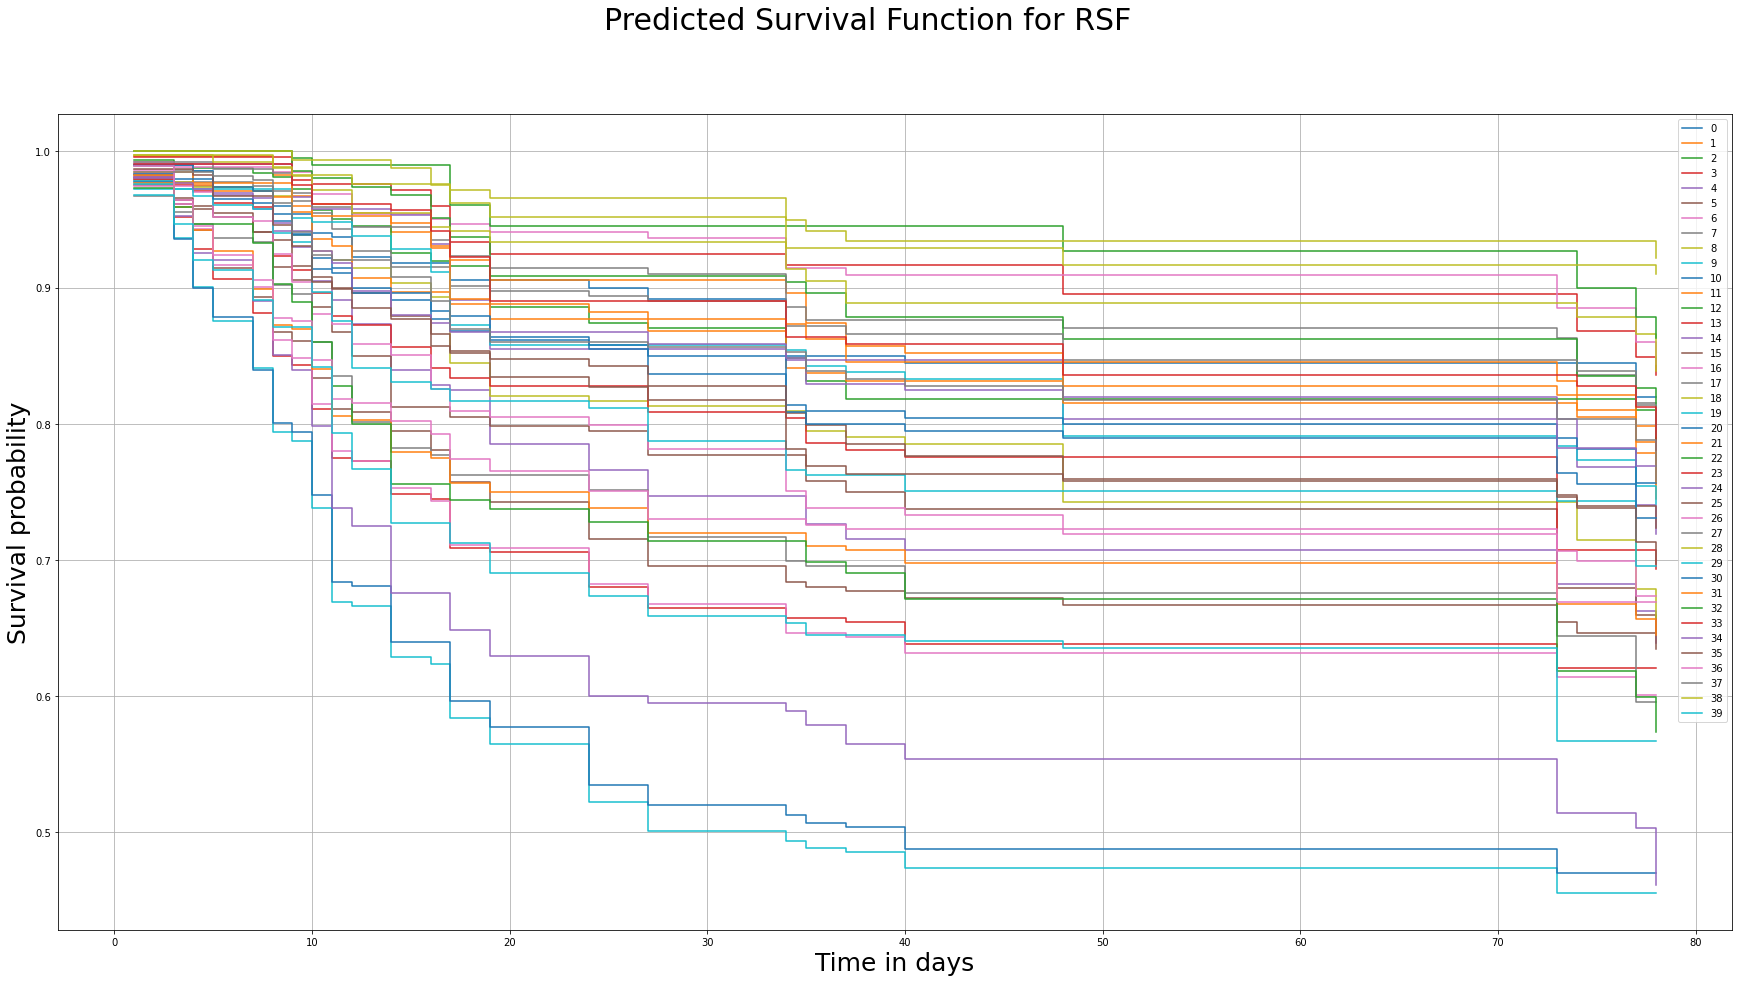

In [ ]:
# Computing the predicted survival function
surv = rsf.predict_survival_function(X_test)
fig= plt.figure(figsize=(30,15))

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post",  label=str(i))
fig.suptitle('Predicted Survival Function for RSF', fontsize=30)
plt.ylabel("Survival probability", fontsize=25)
plt.xlabel("Time in days",  fontsize=25)
plt.grid(True)
plt.legend()

/usr/local/lib/python3.6/dist-packages/sksurv/ensemble/forest.py:461: FutureWarning: predict_cumulative_hazard_function will return an array of StepFunction instances in 0.14. Use return_array=True to keep the old behavior.
  FutureWarning)


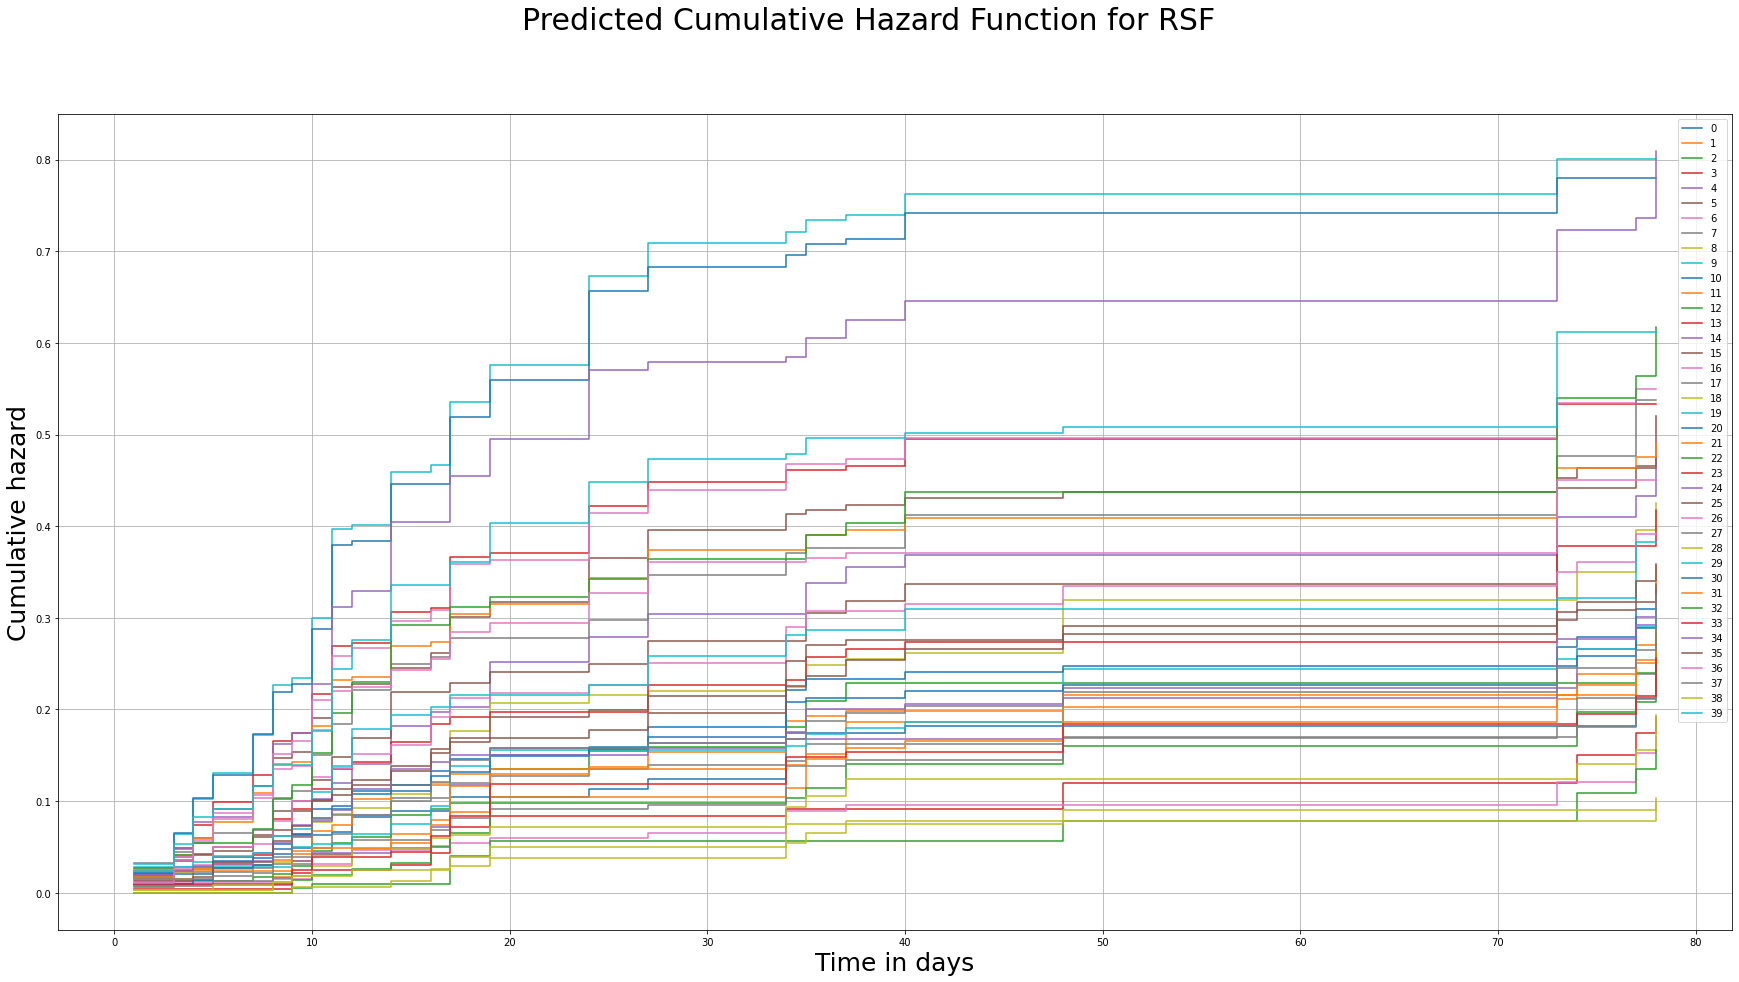

In [ ]:
# Plotting the predicted cumulative hazard function
surv = rsf.predict_cumulative_hazard_function(X_test)
fig= plt.figure(figsize=(30,15))

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post",  label=str(i))
fig.suptitle('Predicted Cumulative Hazard Function for RSF', fontsize=30)
plt.ylabel("Cumulative hazard", fontsize=25)
plt.xlabel("Time in days",  fontsize=25)
plt.grid(True)
plt.legend()

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 9.3MB/s 


# Permutation-based Feature Importance

In [ ]:
# Printing Permutation-based Feature Importance
import eli5
from eli5.sklearn import PermutationImportance

feature_names=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean',
               'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
               'concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
               'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst',
               'fractal_dimension_worst','tumor_size']

perm = PermutationImportance(rsf, n_iter=15, random_state=20)
perm.fit(X_test, arr_test)
eli5.show_weights(perm, feature_names=feature_names)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0312 ± 0.0578,area_mean
0.0237 ± 0.0221,perimeter_mean
0.0044 ± 0.0403,radius_mean
0.0043 ± 0.0088,fractal_dimension_mean
0.0042 ± 0.0213,concavity_se
0.0034 ± 0.0107,symmetry_mean
0.0017 ± 0.0446,area_worst
0.0017 ± 0.0078,compactness_worst
0.0017 ± 0.0155,radius_worst
0.0007 ± 0.0147,smoothness_se


# Summary

*   Two hyperparameters chosen in case of coxph are l1_ratio and n_alphas with values 0.001 and 3 respectively.
*   The c-index value for coxph using the best chosen hyperparameters is **0.8252** for the validation  set.

*   The c-index value for coxph is **0.622302** for the test  set.

* In case of RSF, the hyperparameters chosen are n_estimators and max_features with values 13 and "auto" respectively.

*   The c-index value for rsf using the best chosen hyperparameters is **0.7979** for the validation  set.

* The c-index value in this case is **0.58992** for the test data.

* Hence, it is observed that coxph performs better as compared to RSF in the present scenario. 

* The top 5 features are area_mean, perimeter_mean, radius_mean,fractal_dimension_mean and concavity_se 